In [1]:
from spectral_cube import SpectralCube
from spectral_cube.wcs_utils import drop_axis
#from pvextractor import extract_pv_slice, Path
#import pylab as pl
import numpy as np
from astropy.visualization import quantity_support
from astropy import units as u
from astropy import wcs
#from matplotlib.colors import LogNorm
#from astropy.visualization.stretch import SinhStretch
#from astropy.visualization import simple_norm
import matplotlib.pyplot as plt
from astropy.utils import data
from reproject import reproject_exact
from astropy.io import fits
from reproject.mosaicking import find_optimal_celestial_wcs
from astropy.wcs import WCS


In [2]:
pwd

'/orange/adamginsburg/cmz/g5/code'

In [50]:
#cubename = '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.12CO.spw17.fits'
#cubename = '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.13CO.spw29.fits'
#cubename = '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.C18O.spw31.fits'
#cubename = '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.CH3OH.spw21.fits'
#cubename = '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.H2CO.spw23.fits' 
#cubename = '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.H2CO.spw25.fits' 
#cubename = '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.SiO.spw27.fits'

#cubename = '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.12CO.spw17.fits'
#cubename = '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.13CO.spw29.fits'
#cubename = '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.C18O.spw31.fits'


In [60]:
cubename = '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/g5.12CO.spw17_test.fits'
#cubename = '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/g5.CH3OH.spw21_test.fits'
#cubename = '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/g5.H2CO.spw23_test.fits'
#cubename = '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/g5.H2CO.spw25_test.fits'
#cubename = '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/g5.SiO.spw27_test.fits'
#cubename = '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/g5.13CO.spw29_test.fits'
#cubename = '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/g5.C18O.spw31_test.fits'

In [51]:
#fixedname = '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.12CO.spw17.fits'
#fixedname = '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.CH3OH.spw21.fits'
#fixedname = '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.H2CO.spw23.fits' 
#fixedname = '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.H2CO.spw25.fits' 
#fixedname = '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.SiO.spw27.fits'
#fixedname = '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.13CO.spw29.fits'
#fixedname = '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.C18O.spw31.fits'

#fixedname = '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/galreprojected/g5b.12CO.spw17.fits'
#fixedname = '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/galreprojected/g5b.13CO.spw29.fits'
#fixedname = '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/galreprojected/g5b.C18O.spw31.fits'


In [64]:
#fixedname = '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.12CO.spw17.fits'
#fixedname = '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.CH3OH.spw21.fits'
#fixedname = '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.H2CO.spw23.fits'
#fixedname = '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.H2CO.spw25.fits'
#fixedname = '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.SiO.spw27.fits'
#fixedname = '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.13CO.spw29.fits'
#fixedname = '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.C18O.spw31.fits'

In [61]:
cube = SpectralCube.read(cubename)

In [66]:
hdu = cube[45]
#print(hdu.data[0])
wcs, shape = find_optimal_celestial_wcs([hdu.hdu], frame='galactic', auto_rotate=False)
header = cube.header.copy()
header['NAXIS'] = 3
header['NAXIS1'] = shape[1]
header['NAXIS2'] = shape[0]
header['NAXIS3'] = cube.shape[0]
header.update(wcs.to_header())
header['WCSAXES'] = 3
#print(cube.shape, shape)
#print(header)


In [6]:
cube.allow_huge_operations=True

In [68]:
#cube_repr = cube.reproject(header, use_memmap=True).minimal_subcube(spatial_only=True)

In [69]:
cube_repr = cube.reproject(header, block_size=[100,cube.shape[1],cube.shape[2]]).minimal_subcube(spatial_only=True)

In [70]:
cube_repr.write(fixedname)#,overwrite=True)

INFO: Auto-setting vmin to -1.417e+06 [aplpy.core]
INFO: Auto-setting vmax to  4.394e+06 [aplpy.core]


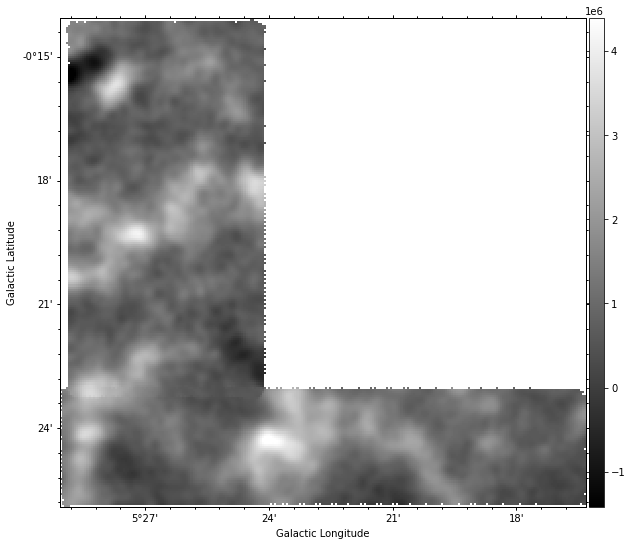

In [71]:
cube_repr.moment0().quicklook()

In [7]:
def combine_headers(header1, header2):
    '''
    Given two Header objects, this function returns a fits Header of the optimal wcs. 

    Parameters
    ----------
    header1 : astropy.io.fits.Header
        A Header.
    header2 : astropy.io.fits.Header
        A Header.

    Returns
    -------
    header : astropy.io.fits.Header
        A header object of a field containing both initial headers. 

    '''

    from reproject.mosaicking import find_optimal_celestial_wcs

    # Get wcs and shape of both headers
    w1 = WCS(header1).celestial
    s1 = w1.array_shape
    w2 = WCS(header2).celestial
    s2 = w2.array_shape

    # Get the optimal wcs and shape for both fields together
    wcs_opt, shape_opt = find_optimal_celestial_wcs([(s1, w1), (s2, w2)], auto_rotate=False)

    # Make a new header using the optimal wcs and information from cubes
    header = header1.copy()
    header['NAXIS'] = 3
    header['NAXIS1'] = shape_opt[1]
    header['NAXIS2'] = shape_opt[0]
    header['NAXIS3'] = header1['NAXIS3']
    header.update(wcs_opt.to_header())
    header['WCSAXES'] = 3
    return header

In [53]:
def mosaic_cubes(cubes, spectral_block_size=100):
    '''
    This function reprojects cubes onto a common grid and combines them to a single field.  

    Parameters
    ----------
    cubes : iterable
        Iterable list of SpectralCube objects to reproject and add together. 
    spectral_block_size : int
        Block size so that reproject does not run out of memory. 

    Outputs
    -------
    cube : SpectralCube
        A spectral cube with the list of cubes mosaicked together.
    '''

    cube1 = cubes[0]
    header = cube1.header

    # Create a header for a field containing all cubes
    for cu in cubes[1:]: 
        header = combine_headers(header, cu.header)

    # Prepare an array and mask for the final cube
    shape_opt = (header['NAXIS3'], header['NAXIS2'], header['NAXIS1'])
    final_array = np.zeros(shape_opt)
    mask_opt = np.zeros(shape_opt[1:])

    for cube in cubes:
        # Reproject cubes to the header
        try:
            cube_repr = cube.reproject(header, block_size=[spectral_block_size, cube.shape[1], cube.shape[2]], order='nearest-neighbor')
        except TypeError:
            warnings.warn("The block_size argument is not accepted by `reproject`.  A more recent version may be needed.")
            cube_repr = cube.reproject(header, order='nearest-neighbor')

        # Create weighting mask
        mask = (cube_repr[0:1].get_mask_array()[0])
        mask_opt += mask.astype(float)

        # Go through each slice of the cube, add it to the final array
        for ii in range(final_array.shape[0]):
            slice1 = np.nan_to_num(cube_repr[ii])
            final_array[ii] = final_array[ii] + slice1

    # Dividing by the mask throws errors where it is zero
    with np.errstate(divide='ignore'):

        # Use weighting mask to average where cubes overlap
        for ss in range(final_array.shape[0]):
            final_array[ss] /= mask_opt

    # Create Cube
    # TODO: this should use the same cube type as cube1
    cube = cube1.__class__(data=final_array*cube1.unit, wcs=WCS(header))  
    return cube

INFO: Auto-setting vmin to -8.896e+03 [aplpy.core]
INFO: Auto-setting vmax to  9.725e+03 [aplpy.core]


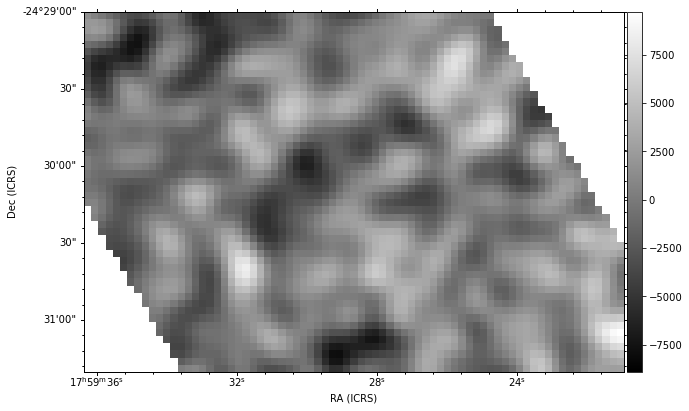

In [62]:
cube[:2, 125:175, 50:125].moment0().quicklook()

In [63]:
#cu.moment0().quicklook()

INFO: Auto-setting vmin to -8.843e+03 [aplpy.core]
INFO: Auto-setting vmax to  8.571e+03 [aplpy.core]


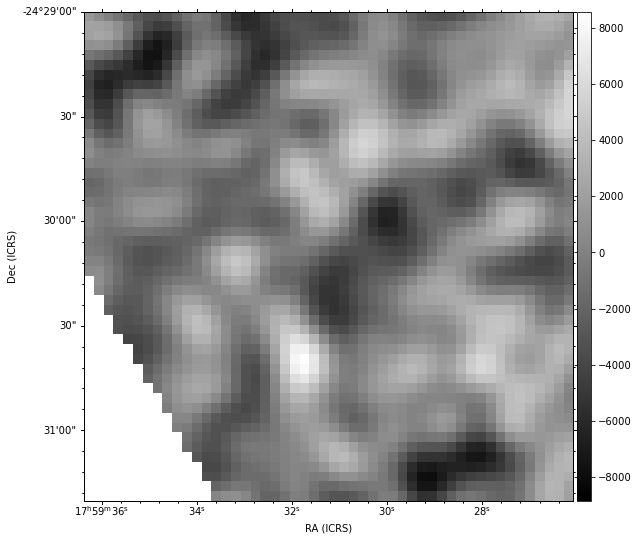

In [64]:
left = cube[:2, 125:175, 50:100]
left.moment0().quicklook()

INFO: Auto-setting vmin to -8.771e+03 [aplpy.core]
INFO: Auto-setting vmax to  9.877e+03 [aplpy.core]


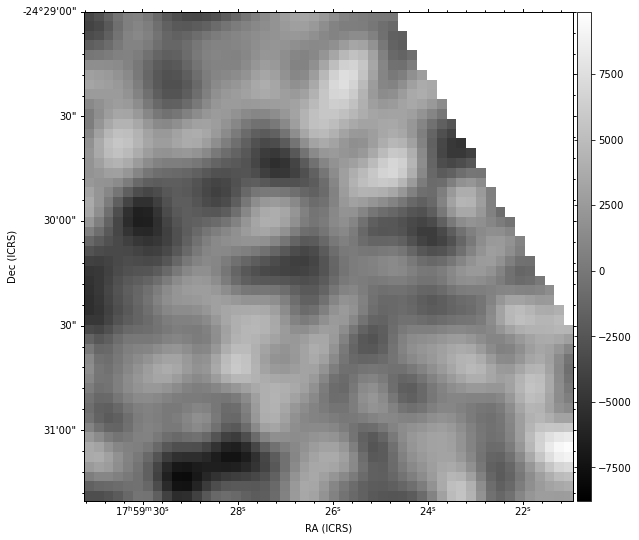

In [65]:
right = cube[:2, 125:175, 75:125]
right.moment0().quicklook()

In [66]:
# left
# right

INFO: Auto-setting vmin to -8.896e+03 [aplpy.core]
INFO: Auto-setting vmax to  9.725e+03 [aplpy.core]


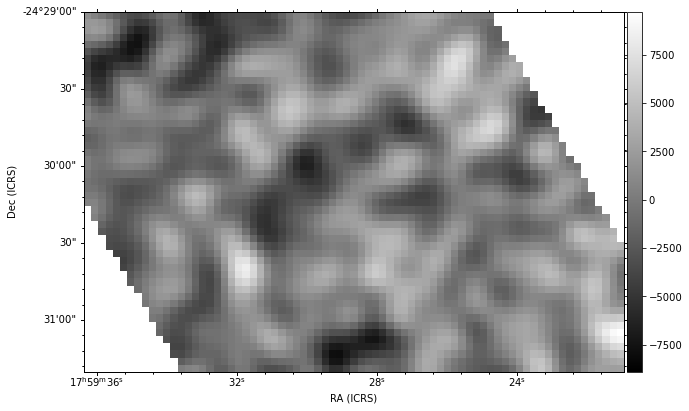

In [67]:
cube[:2, 125:175, 50:125].moment0().quicklook()

INFO: Auto-setting vmin to -8.903e+03 [aplpy.core]
INFO: Auto-setting vmax to  9.747e+03 [aplpy.core]


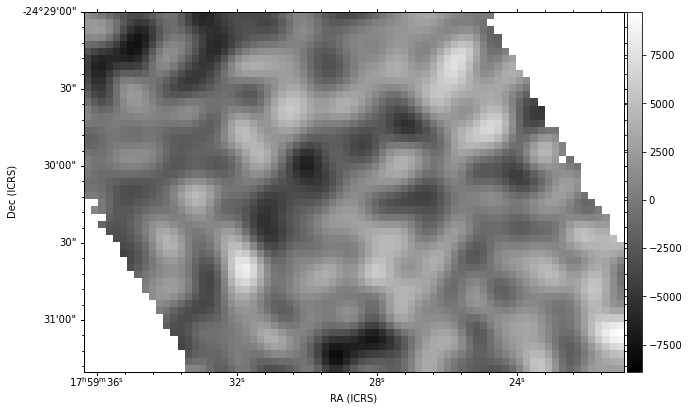

In [69]:
cu.moment0().quicklook()

In [68]:
cu = mosaic_cubes([right, left])

/scratch/local/47013700/ipykernel_17235/936153488.py:52: RuntimeWarning: invalid value encountered in divide
  final_array[ss] /= mask_opt


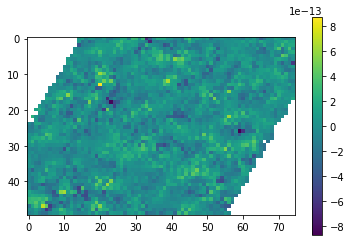

In [70]:
plt.imshow(cube[:2, 125:175, 50:125].filled_data[0]-cu.filled_data[0])
plt.colorbar()

In [71]:
cube[:2, 125:175, 50:125].get_mask_array()

array([[[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False]],

       [[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False]]])

In [72]:
cu.mask

In [73]:
np.isfinite(cu)

array([[[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False]],

       [[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False]]])

In [74]:
#plt.imshow(np.logical_xor(cube.get_mask_array()[0], cube.reproject(cube.header, order='nearest-neighbor').get_mask_array()[0]))

In [48]:
mom0 = cube.moment0()

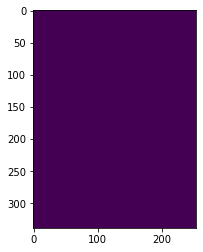

In [76]:
plt.imshow(np.logical_xor(np.isfinite(mom0), np.isfinite(mom0.reproject(mom0.header,order='nearest-neighbor'))))

In [78]:
#plt.imshow(np.logical_xor(cube.get_mask_array()[0], cube.reproject(cube.header).get_mask_array()[0]))

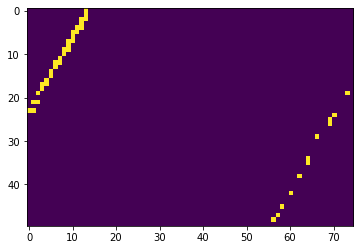

In [79]:
plt.imshow(np.logical_xor(cube[:2, 125:175, 50:125].get_mask_array()[0], np.isfinite(cu)[0]))

In [17]:
cu.header['RESTFRQ']

230538000000.0

In [23]:
cu[0]

<Slice [[       nan,        nan,        nan, ..., 0.00983848, 0.0141771 ,
         0.01760149],
        [       nan,        nan,        nan, ..., 0.01298508, 0.01855736,
         0.02134785],
        [       nan,        nan,        nan, ..., 0.01765479, 0.02427304,
         0.02674029],
        ...,
        [0.01818472, 0.02353016, 0.02690601, ...,        nan,        nan,
                nan],
        [0.01752456, 0.0221742 , 0.0250263 , ...,        nan,        nan,
                nan],
        [0.01297453, 0.01450421, 0.01492713, ...,        nan,        nan,
                nan]]>

In [24]:
vu = cube[:2, 125:175, 50:125]
vu[0]

<Slice [[       nan,        nan,        nan, ..., 0.00983848, 0.0141771 ,
         0.01760149],
        [       nan,        nan,        nan, ..., 0.01298508, 0.01855736,
         0.02134785],
        [       nan,        nan,        nan, ..., 0.01765479, 0.02427304,
         0.02674029],
        ...,
        [0.01818472, 0.02353016, 0.02690601, ...,        nan,        nan,
                nan],
        [0.01752456, 0.0221742 , 0.0250263 , ...,        nan,        nan,
                nan],
        [0.01297453, 0.01450421, 0.01492713, ...,        nan,        nan,
                nan]]>

In [42]:
ex = cube[:2, 125:128, 50:53]

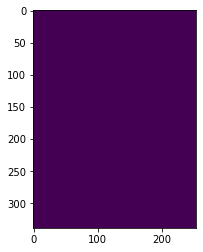

In [2]:
from spectral_cube import SpectralCube
import numpy as np
import matplotlib.pyplot as plt

# Read in a spectral cube
cubename = '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/g5.H2CO.spw23_test.fits' # Example data
cube = SpectralCube.read(cubename)

cutcube = cube[:1]
repro_cutcube = cutcube.reproject(cutcube.header, order='nearest-neighbor')

cutcube_mask = np.isfinite(cutcube)
repro_cutcube_mask = np.isfinite(repro_cutcube)

edges = np.logical_xor(cutcube_mask, repro_cutcube_mask)

plt.imshow(edges[0])

In [128]:
#@pytest.mark.parametrize('use_memmap', (True, False))
def test_reproject(use_memmap, data_adv, use_dask):

    #pytest.importorskip('reproject')

    cube, data = cube_and_raw(data_adv, use_dask=use_dask)

    wcs_in = WCS(cube.header)
    wcs_out = wcs_in.deepcopy()
    wcs_out.wcs.ctype = ['GLON-SIN', 'GLAT-SIN', wcs_in.wcs.ctype[2]]
    wcs_out.wcs.crval = [134.37608, -31.939241, wcs_in.wcs.crval[2]]
    wcs_out.wcs.crpix = [2., 2., wcs_in.wcs.crpix[2]]

    header_out = cube.header
    header_out['NAXIS1'] = 4
    header_out['NAXIS2'] = 5
    header_out['NAXIS3'] = cube.shape[0]
    header_out.update(wcs_out.to_header())

    result = cube.reproject(header_out, use_memmap=use_memmap)

    assert result.shape == (cube.shape[0], 5, 4)
    # Check WCS in reprojected matches wcs_out
    assert wcs_out.wcs.compare(result.wcs.wcs)
    # And that the headers have equivalent WCS info.
    result_wcs_from_header = WCS(result.header)
    assert result_wcs_from_header.wcs.compare(wcs_out.wcs)

In [ ]:
@pytest.mark.parametrize('use_memmap', (True, False))
def test_mosaic_cubes(use_memmap, data_adv, use_dask):
    # Read in data to use
    cube, data = cube_and_raw(data_adv, use_dask=use_dask)
    
    # Make two overlapping cubes of the data
    part1 = cube[:, :round(cube.shape[1]*2./3.),:]
    part2 = cube[:, round(cube.shape[1]/3.):,:]
    
    result = mosaic_cubes([part1, part2])
    
    # Check that the shapes are the same
    assert result.shape == cube.shape 
    # Check WCS in reprojected matches wcs_out
    assert (cube).wcs.compare(result.wcs.wcs)
    # Check that values of original and result are comaprable
    np.testing.assert_almost_equal(result.filled_data[:], cube.filled_data[:])
    

In [12]:
from spectral_cube.tests.test_spectral_cube import cube_and_raw


/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(


In [133]:
use_memmap = True
data_adv = '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.H2CO.spw25.fits'
use_dask = False

test_reproject(use_memmap, data_adv, use_dask)

In [23]:
cube.shape[2]

267

In [19]:
b = cube[:,:13,:]

In [20]:
b.shape

(2048, 13, 267)

In [25]:
bb  = b[:, :round(b.shape[1]/2),:]
bbb = b[:, round(b.shape[1]/2):,:]

In [26]:
bb.shape

(2048, 6, 267)

In [27]:
bbb.shape

(2048, 7, 267)